# CPI Inflation

Plot CPI Inflation using World Bank data.

In [8]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")
source("/usr/share/pluto/goofy/misc.common.R")

library(ggthemes)
library(quantmod)
library(reshape2)
library(ggrepel)
library(PerformanceAnalytics)

options(repr.plot.width=16, repr.plot.height=8)

fred<-Fred()
wb <- WorldBank()

In [2]:
# see example: https://nbviewer.jupyter.org/github/shyams80/plutons/blob/master/docs-R/WorldBank.ipynb

wb$Meta() %>%
    filter(INDICATOR_NAME %like% "CPI%") %>%
    select(COUNTRY_NAME, INDICATOR_NAME, COUNTRY_KEY, INDICATOR_KEY) %>%
    arrange(COUNTRY_NAME) %>%
    print(n=Inf)

# Source:     lazy query [?? x 4]
# Database:   NORWAY:StockVizUs:R
# Ordered by: COUNTRY_NAME
    COUNTRY_NAME              INDICATOR_NAME           COUNTRY_KEY INDICATOR_KEY
    <chr>                     <chr>                          <int>         <int>
  1 Afghanistan               CPI Price, nominal                 2             3
  2 Afghanistan               CPI Price, nominal, sea…           2             5
  3 Afghanistan               CPI Price, % y-o-y, nom…           2             6
  4 Albania                   CPI Price, nominal                 5             3
  5 Albania                   CPI Price, nominal, sea…           5             5
  6 Albania                   CPI Price, % y-o-y, nom…           5             6
  7 Algeria                   CPI Price, nominal                84             3
  8 Algeria                   CPI Price, nominal, sea…          84             5
  9 Algeria                   CPI Price, % y-o-y, nom…          84             6
 10 Angola    

In [12]:
#India: 135, US: 289. KEY: 6

cpiInflation <- wb$TimeSeries() %>%
    full_join(wb$TimeSeries(), by=c('INDICATOR_KEY', 'YEAR')) %>%
    filter(COUNTRY_KEY.x == 135 & COUNTRY_KEY.y == 289 & INDICATOR_KEY == 6) %>%
    select(YEAR, INDIA = VALUE.x, US = VALUE.y) %>%
    arrange(YEAR) %>%
    collect() %>%
    as.data.frame()

print(cpiInflation)

   YEAR   INDIA      US
1  1987  8.7938  3.5782
2  1988  9.3960  4.1000
3  1989  3.2747  4.7911
4  1990  8.9651  5.4192
5  1991 13.8644  4.2158
6  1992 11.7933  3.0416
7  1993  6.3642  2.9697
8  1994  6.3400  2.5956
9  1995 11.3395  2.8054
10 1996  8.8972  2.9367
11 1997  5.6487  2.3376
12 1998  4.4739  1.5470
13 1999  5.9058  2.1931
14 2000  5.9895  3.3667
15 2001  3.6844  2.8166
16 2002  5.2034  1.5957
17 2003  4.3249  2.2980
18 2004  3.8532  2.6676
19 2005  3.7438  3.3658
20 2006  6.0617  3.2221
21 2007  5.9915  2.8706
22 2008  8.5729  3.8150
23 2009  9.7268 -0.3204
24 2010 10.3605  1.6366
25 2011  8.3140  3.1397
26 2012  9.3823  2.0732
27 2013 10.1005  1.4660
28 2014  6.4232  1.6118
29 2015  4.9105  0.1209
30 2016  4.9489  1.2716
31 2017  3.3259  2.1387
32 2018  3.3429  1.8910
33 2019  2.3848  1.3531


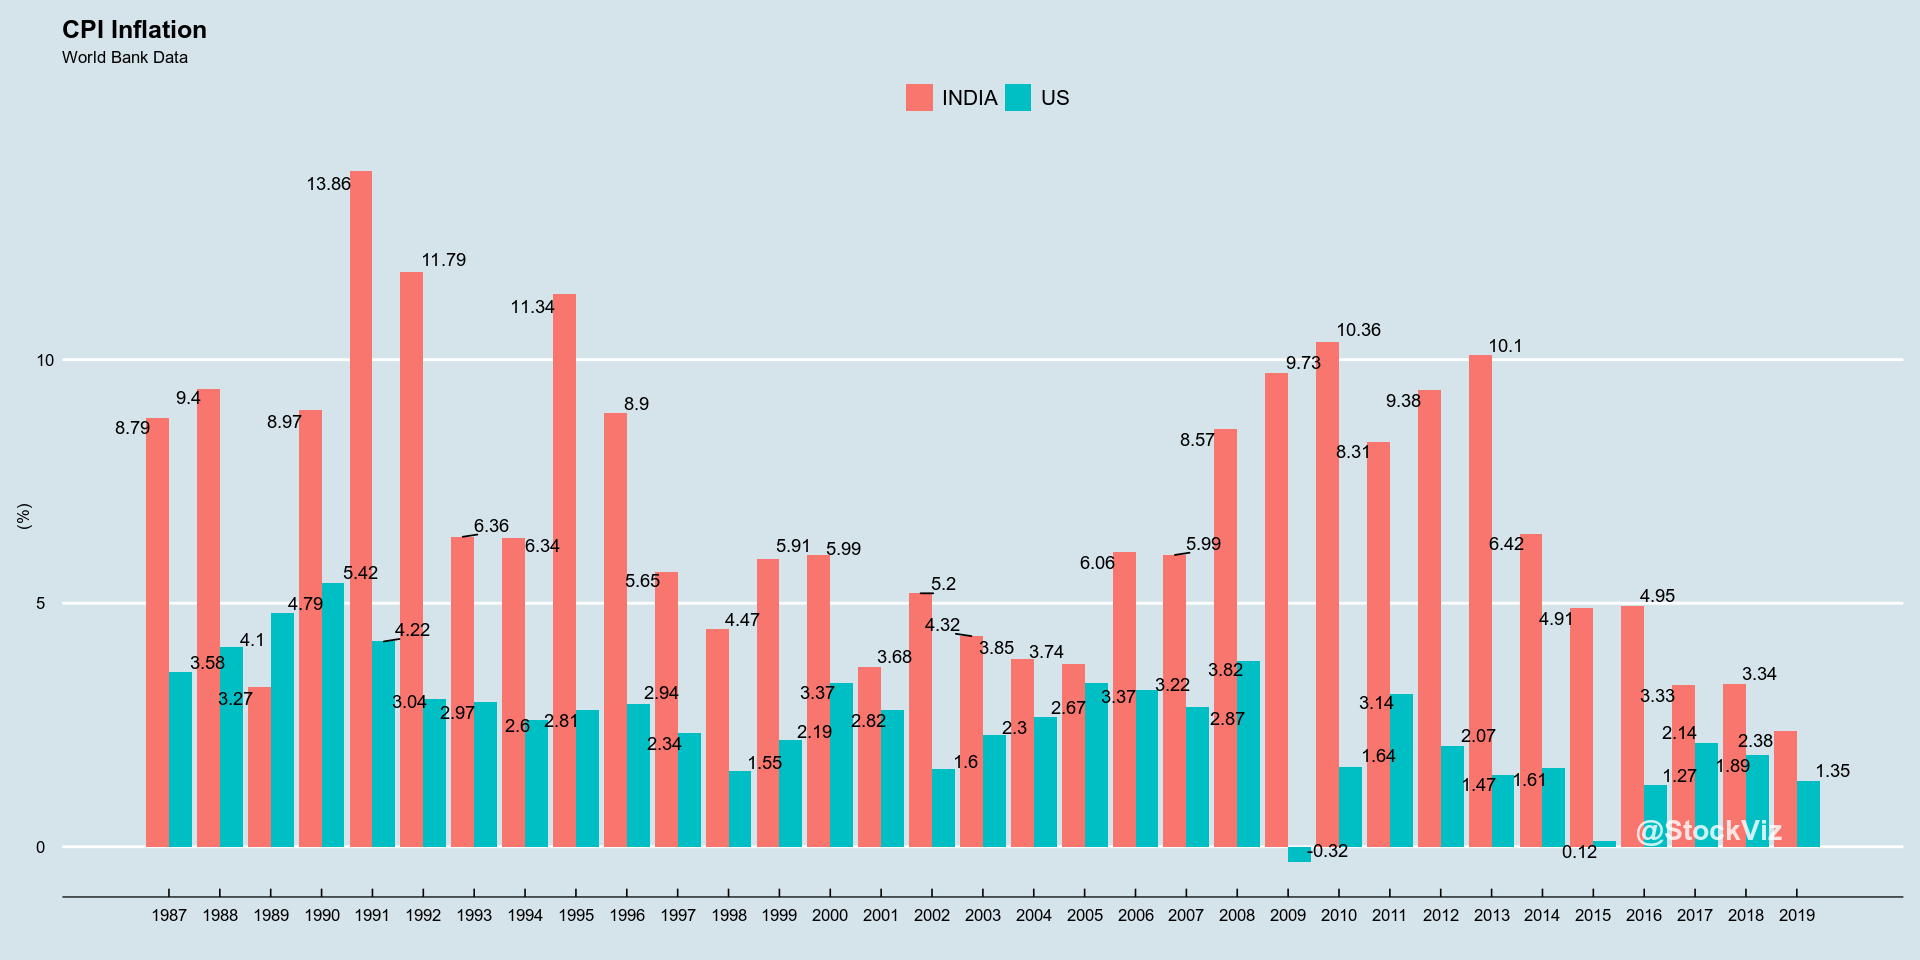

In [9]:
mDf <- melt(cpiInflation, id='YEAR')
ggplot(mDf, aes(x=YEAR, y=value, fill=variable)) +
    theme_economist() +
    geom_bar(stat="identity", position=position_dodge()) +
    scale_x_continuous(labels=cpiInflation$YEAR, breaks=cpiInflation$YEAR) +
    geom_text_repel(aes(label= round(value, 2)), position = position_dodge(0.9)) +
    labs(x='', y='(%)', fill='', title="CPI Inflation", 
         subtitle="World Bank Data") +
    annotate("text", x=max(cpiInflation$YEAR), y=min(mDf$value), 
             label = "@StockViz", hjust=1.1, vjust=-1.1, 
             col="white", cex=6, fontface = "bold", alpha = 0.8)  

This notebook was created using [pluto](https://pluto.studio). Thank you for playing fair!